In [41]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [7]:
mnist_data = fetch_openml("mnist_784", version=1, parser='auto')

In [10]:
print(mnist_data)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ..

In [11]:
# for quick visualizations and data explorations directly within the notebook 
%matplotlib inline

In [12]:
import matplotlib
import matplotlib.pyplot as plt

In [16]:
#assigning featurtes to X and Target values to y in mnist dataset
X, y = mnist_data['data'], mnist_data['target']

In [18]:
#viewing shape of the X and y

print('shape of X:',X.shape)
print('shape of y:',y.shape)

shape of X: (70000, 784)
shape of y: (70000,)


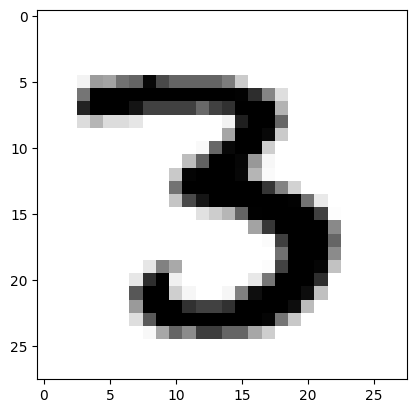

In [40]:
#viewing random image in dataset
sample_image = X.iloc[12]

#converting series in numpy array
sample_image = np.array(sample_image)

#for perfect viewing reshaping the image to 28*28 pexels
sample_image = sample_image.reshape(28,28)

#displaying image in black and white using matplotlib.cm.binary method and avoiding any interpolation in image
plt.imshow(sample_image, cmap=matplotlib.cm.binary, interpolation='nearest')

In [42]:
#data splittig
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.linear_model import LogisticRegression

In [61]:
#loading logistic classifiaction model with tolerance '0.1'
logistic_clf = LogisticRegression(tol=0.1, solver = 'sag')

In [46]:
#training logistic regression classifier model
logistic_clf.fit(X_train, y_train)

C:\Users\thota\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [48]:
#performing prediction
y_pred = logistic_clf.predict(X_test)

In [56]:
#Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Logistic Regression Model Accuracy: ',accuracy_score(y_test, y_pred),'\n')

print(classification_report(y_test, y_pred))

Logistic Regression Model Accuracy:  0.9178571428571428 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.91      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.85      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.87      0.87      0.87      1357
           9       0.90      0.89      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [62]:
#performing cross validation evaluation
from sklearn.model_selection import cross_val_score

cross_validation_accuracy = cross_val_score(logistic_clf, X_train, y_train, cv=3, scoring="accuracy")

In [63]:
#calculating cross validation mean accuracy
print('cross validation mean accuracy: ',cross_validation_accuracy.mean())

cross validation mean accuracy:  0.9169821166557707
